# Punic Plots:
Do diverse new plots

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/punic_aDNA/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("No compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

from hapsburg.figures.plot_bars import plot_panel_row, prepare_dfs_plot

### Hack for Basemaps
import mpl_toolkits
mpl_toolkits.__path__.append(
    '/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label
from hapsburg.figures.plot_individual_roh import plot_pde_individual, plot_roh_individual
from hapsburg.figures.plot_posterior import plot_posterior_cm

compute-a-16-171.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/punic_aDNA
CPU Count: 32


In [4]:
def get_iids_df(df, iids=[]):
    """Get List of IIDs from Dataframe"""
    idx = df["iid"].isin(iids)
    df_t = df[idx].copy().reset_index(drop=True)
    print(f"Found {np.sum(idx)}/{len(iids)} Individuals")
    return df_t

# Load ROH Data and Context Indivdiuals

In [8]:
df1 = pd.read_csv("/n/groups/reich/hringbauer/hapsburg_runs/output/combined_roh05.v49.2.unique.tsv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)
print(f"Loaded {len(df1)} Individuals with ROH")

### Load context Individuals
df_context = pd.read_csv("./output/tables/reference_samples_plot.v49.2.tsv", sep="\t")
print(f"Loaded {len(df_context)} Individuals")

df_c1 = pd.merge(df1, df_context[["iid", "label"]], on="iid")
print(f"Merged to {len(df_c1)} Context Individuals with ROH")

df_clst = pd.read_csv("./data/cluster_assignments_punic.v54.1f.tsv", sep="\t")
print(f"Loaded Cluster Information for {len(df_clst)} Individuals.\n")

Loaded 15087 Individuals with ROH
Loaded 146 Individuals
Merged to 79 Context Individuals with ROH
Loaded Cluster Information for 158 Individuals.



## Plot ROH in T774 Sample

In [51]:
df_vill = df_clst[df_clst["location"].str.contains("Villaricos")]
df_vill_pun = df_vill[df_vill["label"].str.contains("Punic")].copy()

iids_t774 = ["I18199", "I18200", "I18201", "I18202", "I18203"]
iids_nt774 = df_vill_pun[~df_vill_pun["iid"].isin(iids_t774)]["iid"].values

idx=df1["iid"].isin(iids_t774)
dft = df1[idx].copy()
dft["label"]="Tomb 774"

Saved figure to ./figures/hapROH/T774_ROH.pdf


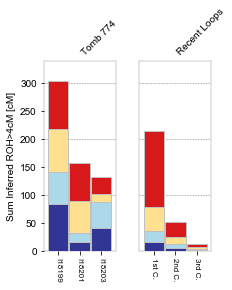

In [52]:
plot_dfs, cols = prepare_dfs_plot(dft, cms=[4, 8, 12, 20],  col_group='label')

plot_panel_row(plot_dfs[:], wspace=0.0, r_title=45, leg_pos=-2,
               figsize=(3, 3.5), title_col="label",
               ylim=[0, 340], hlines=[100,200, 300, 400], Ns=[],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/T774_ROH.pdf")

In [ ]:
plot_dfs, cols = prepare_dfs_plot(df_c1, cms=[4, 8, 12, 20],  col_group='label')

plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-2,
               figsize=(12, 3.5), title_col="label",
               ylim=[0, 220], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/panel1.pdf")

# Plot Upper Row: Context Individuals

Saved figure to ./figures/hapROH/panel1.pdf


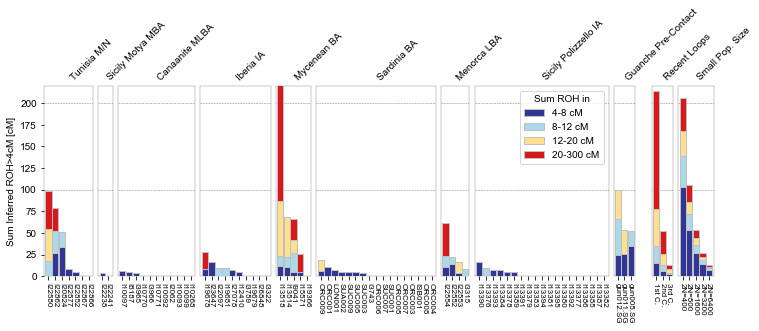

In [66]:
plot_dfs, cols = prepare_dfs_plot(df_c1, cms=[4, 8, 12, 20],  col_group='label')

plot_panel_row(plot_dfs[:], wspace=0.1, r_title=45, leg_pos=-2,
               figsize=(12, 3.5), title_col="label",
               ylim=[0, 220], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/panel1.pdf")

# Plot lower row: All the Punic samples

In [69]:
iids = ["I12666", "I12847", "I24678",
        "I24676",  "I24675",  "I24556",
        "I22095",  "I4798", "I4799", "I4800",
        "I7762", "I22236", "I21853"]
df_t = get_iids_df(df1, iids)
df_t["clst"] = "Sicily Punic \n800-400 calBCE"

iids = ["I24555", "I12848", "I21857",
        "I21197",  "I21855"]

df_tl = get_iids_df(df1, iids)
df_tl["clst"] = "Sicily Punic \n400-200 calBCE"

iids = ["I22115", "I22121", "I22096",
        "I22122", "I22118", "I22117"]
df_t2 = get_iids_df(df1, iids)
df_t2["clst"] = "Tharros Punic \n800-400 calBCE"

iids = ["I22114", "I22119", "I21966"]
df_t2l = get_iids_df(df1, iids)
df_t2l["clst"] = "Tharros Punic \n400-200 calBCE"

iids = ["I26842.v47", "I26915", "I26931", "I26932"] # Cadir Individual

df_t3 = get_iids_df(df1, iids)
df_t3["clst"] = "Malaga Punic"

# "I18193", "I18189","I18191",
iids = [ "I18199", "I18200", "I18201", 
        "I18203", "I18202"]
df_t4 = get_iids_df(df1, iids)
df_t4["clst"] = "Villaricos \nAegean Cluster"

df_t5 = df1[df1["clst"].str.contains("Israel_Phoen")].copy()
df_t5["clst"] = "Israel Phoenician"

iids = ["I27602", "I27618", "I27619", "I27620", "I27610", "I27614", "I27613"]
df_t6 = get_iids_df(df1, iids)
df_t6["clst"] = "Eivissa Punic"

Found 12/13 Individuals
Found 5/5 Individuals
Found 6/6 Individuals
Found 3/3 Individuals
Found 4/4 Individuals
Found 3/5 Individuals
Found 4/7 Individuals


Saved figure to ./figures/hapROH/panel2.pdf


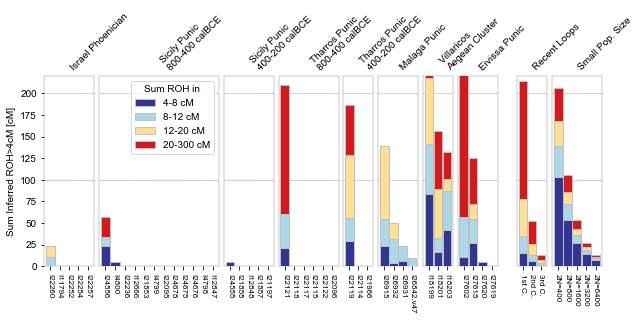

In [70]:
plot_panel_row((df_t5, df_t, df_tl, df_t2, df_t2l, df_t3, df_t4, df_t6), wspace=0.1, r_title=45, leg_pos=-7,
               figsize=(10, 3.5),
               ylim=[0, 220], hlines=[100,200, 300, 400],
               degrees=[1,2,3], ticks_c=['1st C.', '2nd C.', '3rd C.'],
               savepath="./figures/hapROH/panel2.pdf")

# Spain Punic

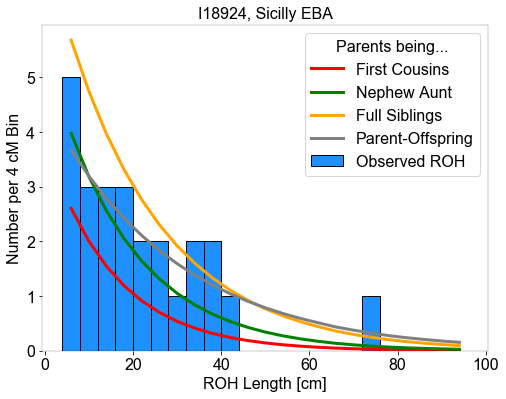

In [21]:
plot_pde_individual(iid="I18924", folder='./hapsburg_runs/output/v43_full/', 
                    prefix_out='', title="I18924, Sicilly EBA",
                    ms=[6, 5, 4, 3],  comm_ancs=[4, 4, 4, 2],
                    labels=['First Cousins', "Nephew Aunt", "Full Siblings", "Parent-Offspring"],
                    savepath="") # ./hapsburg_runs/dumpster/for_alissa/curves_HIM001.png

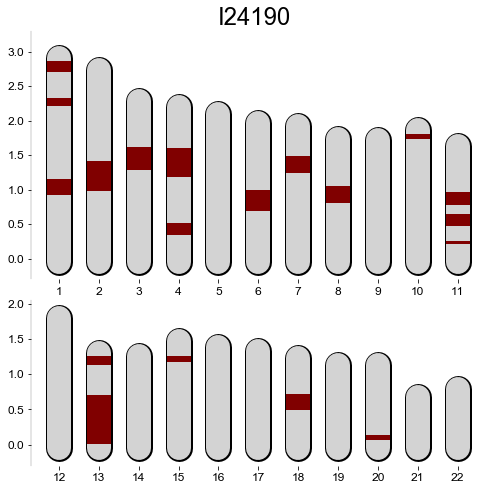

In [47]:
plot_roh_individual(iid="I24190", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  #

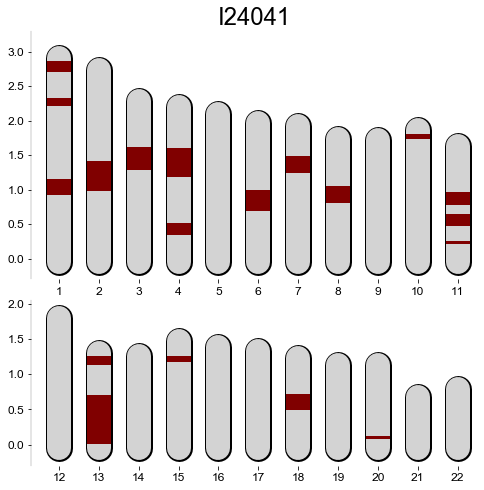

In [42]:
plot_roh_individual(iid="I24041", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # ./hapsburg_runs/figures/v46/I24367_karyo.pdf

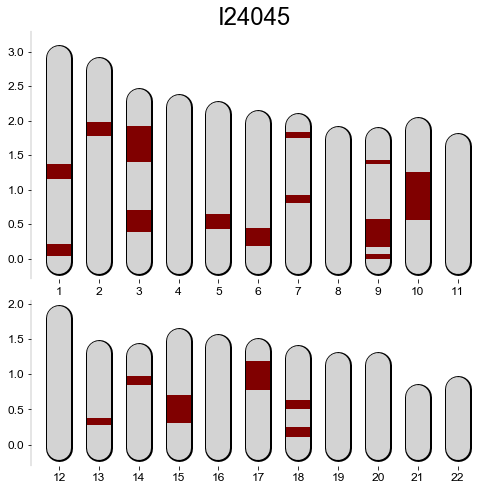

In [45]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

In [ ]:
plot_roh_individual(iid="I24045", folder="./hapsburg_runs/output/v43_full/", 
                    prefix_out="", min_cm=4, plot_bad=False, gap=4,
                    savepath="")  # 

Successfully loaded Data from: ./hapsburg_runs/output/v43_full/HIM001.SG/chr17/


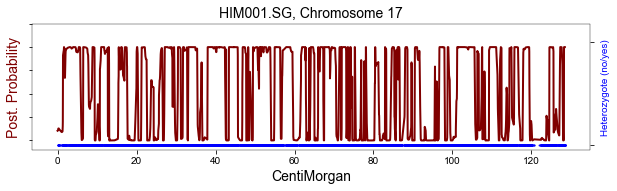

In [4]:
plot_posterior_cm(folder = "./hapsburg_runs/output/v43_full/HIM001.SG/chr17/", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="HIM001.SG, Chromosome 17",
                  savepath=""
                  )

# 